# More Pandas Operations

Please install `nycflights13` package to your environment. This package is not available from conda, so you will have to use pip to install the package. 

- From terminal: activate your `BIOSTAT203C-24S` environment (`conda activate BIOSTAT203C-24S`) and issue the command `pip install nycflights13`.
- OR launch Jupyter Notebook/Lab from the `BIOSTAT203C-24S` environment, select the kernel `conda env:BIOSTAT203C-24S`, then run the cell below.


In [ ]:
!pip install nycflights13

__iClicker Poll:__ Same opening iClicker poll as usual, but it could be heavier today. Please comment anything about the class, and the current situation in UCLA.

## Lambda function

You can define a function without a name if the function definition is a one-liner. 

In [1]:
def double(x):
    return 2*x

print(double(2))

4


In [2]:
double = lambda x : 2 * x # double(x) = 2x
print(double(3))

6


In [3]:
multiply = lambda x, y: x * y

print(multiply(2, 3))

6


In [4]:
f = lambda x: print(x)

r = f(2)
print(r)

2
None


In [5]:
def remain(x):
    return x % 2

In [9]:
L = [3, 1, 23, 4, 6, 100]

In [10]:
L.sort(key=lambda x: x % 2) # [1, 1, 1, 0, 0, 0] 
print(L)

[4, 6, 100, 3, 1, 23]


In [11]:
?L.sort

Signature: L.sort(*, key=None, reverse=False)
Docstring:
Sort the list in ascending order and return None.

The sort is in-place (i.e. the list itself is modified) and stable (i.e. the
order of two equal elements is maintained).

If a key function is given, apply it once to each list item and sort them,
ascending or descending, according to their function values.

The reverse flag can be set to sort in descending order.
Type:      builtin_function_or_method

## Let's get back with `DataFrame`s.

`nycflight13` dataset: 

- 336,776 flights that departed from New York City in 2013

In [12]:
import pandas as pd
import numpy as np
from nycflights13 import flights
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01T10:00:00Z
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01T10:00:00Z
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01T10:00:00Z
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01T10:00:00Z
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30T18:00:00Z
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01T02:00:00Z
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30T16:00:00Z
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30T15:00:00Z


In [13]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336776 entries, 0 to 336775
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            336776 non-null  int64  
 1   month           336776 non-null  int64  
 2   day             336776 non-null  int64  
 3   dep_time        328521 non-null  float64
 4   sched_dep_time  336776 non-null  int64  
 5   dep_delay       328521 non-null  float64
 6   arr_time        328063 non-null  float64
 7   sched_arr_time  336776 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         336776 non-null  object 
 10  flight          336776 non-null  int64  
 11  tailnum         334264 non-null  object 
 12  origin          336776 non-null  object 
 13  dest            336776 non-null  object 
 14  air_time        327346 non-null  float64
 15  distance        336776 non-null  int64  
 16  hour            336776 non-null  int64  
 17  minute    

In [14]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 20)

Note there are some differences of this flights data from that in `tidyverse`. The data types for some variables are different. There are no natural ways in Pandas to hold integer column with missing values; so `dep_time` and `arr_time` are `float64` instead of `int64`.

To be more consistent with `tidyverse`, we cast `time_hour` to `datetime` type.



In [15]:
flights['time_hour'] = pd.to_datetime(flights['time_hour'])


In [16]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 18:00:00+00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01 02:00:00+00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 16:00:00+00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 15:00:00+00:00


## Manipulating rows

### Filtering rows

To select flights departed on Jan 1:

In [18]:
flights.loc[(flights['month']==1) & (flights['day']==1)] # iClicker: select rows with month == 1 and day == 1. 

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2013,1,1,2356.0,2359,-3.0,425.0,437,-12.0,B6,727,N588JB,JFK,BQN,186.0,1576,23,59,2013-01-02 04:00:00+00:00
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01 21:00:00+00:00
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-02 00:00:00+00:00
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01 20:00:00+00:00


We can do the same thing with the `.query()` method. The argument is a simple boolean expression incorporating column names directly. 

In [19]:
flights.query("month == 1 & day == 1")

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
837,2013,1,1,2356.0,2359,-3.0,425.0,437,-12.0,B6,727,N588JB,JFK,BQN,186.0,1576,23,59,2013-01-02 04:00:00+00:00
838,2013,1,1,NaN,1630,NaN,NaN,1815,NaN,EV,4308,N18120,EWR,RDU,NaN,416,16,30,2013-01-01 21:00:00+00:00
839,2013,1,1,NaN,1935,NaN,NaN,2240,NaN,AA,791,N3EHAA,LGA,DFW,NaN,1389,19,35,2013-01-02 00:00:00+00:00
840,2013,1,1,NaN,1500,NaN,NaN,1825,NaN,AA,1925,N3EVAA,LGA,MIA,NaN,1096,15,0,2013-01-01 20:00:00+00:00


Flights on Nov or Dec: 

In [20]:
flights.loc[(flights.month == 11) | (flights.month == 12)] # select rows with month == 11 or month == 12

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
55893,2013,11,1,5.0,2359,6.0,352.0,345,7.0,B6,745,N568JB,JFK,PSE,205.0,1617,23,59,2013-11-02 03:00:00+00:00
55894,2013,11,1,35.0,2250,105.0,123.0,2356,87.0,B6,1816,N353JB,JFK,SYR,36.0,209,22,50,2013-11-02 02:00:00+00:00
55895,2013,11,1,455.0,500,-5.0,641.0,651,-10.0,US,1895,N192UW,EWR,CLT,88.0,529,5,0,2013-11-01 09:00:00+00:00
55896,2013,11,1,539.0,545,-6.0,856.0,827,29.0,UA,1714,N38727,LGA,IAH,229.0,1416,5,45,2013-11-01 09:00:00+00:00
55897,2013,11,1,542.0,545,-3.0,831.0,855,-24.0,AA,2243,N5CLAA,JFK,MIA,147.0,1089,5,45,2013-11-01 09:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111291,2013,12,31,NaN,705,NaN,NaN,931,NaN,UA,1729,NaN,EWR,DEN,NaN,1605,7,5,2013-12-31 12:00:00+00:00
111292,2013,12,31,NaN,825,NaN,NaN,1029,NaN,US,1831,NaN,JFK,CLT,NaN,541,8,25,2013-12-31 13:00:00+00:00
111293,2013,12,31,NaN,1615,NaN,NaN,1800,NaN,MQ,3301,N844MQ,LGA,RDU,NaN,431,16,15,2013-12-31 21:00:00+00:00
111294,2013,12,31,NaN,600,NaN,NaN,735,NaN,UA,219,NaN,EWR,ORD,NaN,719,6,0,2013-12-31 11:00:00+00:00


In [22]:
flights.query("month == 11 | month == 12") # iClicker exercise. Complete this expression.

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
55893,2013,11,1,5.0,2359,6.0,352.0,345,7.0,B6,745,N568JB,JFK,PSE,205.0,1617,23,59,2013-11-02 03:00:00+00:00
55894,2013,11,1,35.0,2250,105.0,123.0,2356,87.0,B6,1816,N353JB,JFK,SYR,36.0,209,22,50,2013-11-02 02:00:00+00:00
55895,2013,11,1,455.0,500,-5.0,641.0,651,-10.0,US,1895,N192UW,EWR,CLT,88.0,529,5,0,2013-11-01 09:00:00+00:00
55896,2013,11,1,539.0,545,-6.0,856.0,827,29.0,UA,1714,N38727,LGA,IAH,229.0,1416,5,45,2013-11-01 09:00:00+00:00
55897,2013,11,1,542.0,545,-3.0,831.0,855,-24.0,AA,2243,N5CLAA,JFK,MIA,147.0,1089,5,45,2013-11-01 09:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111291,2013,12,31,NaN,705,NaN,NaN,931,NaN,UA,1729,NaN,EWR,DEN,NaN,1605,7,5,2013-12-31 12:00:00+00:00
111292,2013,12,31,NaN,825,NaN,NaN,1029,NaN,US,1831,NaN,JFK,CLT,NaN,541,8,25,2013-12-31 13:00:00+00:00
111293,2013,12,31,NaN,1615,NaN,NaN,1800,NaN,MQ,3301,N844MQ,LGA,RDU,NaN,431,16,15,2013-12-31 21:00:00+00:00
111294,2013,12,31,NaN,600,NaN,NaN,735,NaN,UA,219,NaN,EWR,ORD,NaN,719,6,0,2013-12-31 11:00:00+00:00


### Remove rows with duplicate values

In [23]:
flights.drop_duplicates(subset = ['month']) # the first recorded flight from each month

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00
27004,2013,10,1,447.0,500,-13.0,614.0,648,-34.0,US,1877,N538UW,EWR,CLT,69.0,529,5,0,2013-10-01 09:00:00+00:00
55893,2013,11,1,5.0,2359,6.0,352.0,345,7.0,B6,745,N568JB,JFK,PSE,205.0,1617,23,59,2013-11-02 03:00:00+00:00
83161,2013,12,1,13.0,2359,14.0,446.0,445,1.0,B6,745,N715JB,JFK,PSE,195.0,1617,23,59,2013-12-02 04:00:00+00:00
111296,2013,2,1,456.0,500,-4.0,652.0,648,4.0,US,1117,N197UW,EWR,CLT,98.0,529,5,0,2013-02-01 10:00:00+00:00
136247,2013,3,1,4.0,2159,125.0,318.0,56,142.0,B6,11,N706JB,JFK,FLL,166.0,1069,21,59,2013-03-02 02:00:00+00:00
165081,2013,4,1,454.0,500,-6.0,636.0,640,-4.0,US,1843,N566UW,EWR,CLT,84.0,529,5,0,2013-04-01 09:00:00+00:00
193411,2013,5,1,9.0,1655,434.0,308.0,2020,408.0,VX,413,N628VA,JFK,LAX,341.0,2475,16,55,2013-05-01 20:00:00+00:00
222207,2013,6,1,2.0,2359,3.0,341.0,350,-9.0,B6,739,N618JB,JFK,PSE,200.0,1617,23,59,2013-06-02 03:00:00+00:00
250450,2013,7,1,1.0,2029,212.0,236.0,2359,157.0,B6,915,N653JB,JFK,SFO,315.0,2586,20,29,2013-07-02 00:00:00+00:00


### Sample rows
Select `n` rows:

In [24]:
flights.sample(n = 10, axis = 0, replace = True)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
66754,2013,11,12,1849.0,1855,-6.0,2133.0,2059,34.0,US,2039,N557UW,LGA,CLT,105.0,544,18,55,2013-11-12 23:00:00+00:00
320594,2013,9,13,1253.0,1300,-7.0,1555.0,1550,5.0,AA,1145,N3ECAA,LGA,DFW,187.0,1389,13,0,2013-09-13 17:00:00+00:00
60627,2013,11,6,842.0,845,-3.0,1209.0,1211,-2.0,UA,1581,N38451,EWR,SEA,350.0,2402,8,45,2013-11-06 13:00:00+00:00
69904,2013,11,16,610.0,615,-5.0,852.0,915,-23.0,UA,482,N498UA,EWR,FLL,143.0,1065,6,15,2013-11-16 11:00:00+00:00
108920,2013,12,29,1025.0,1030,-5.0,1251.0,1254,-3.0,DL,1345,N989AT,EWR,ATL,119.0,746,10,30,2013-12-29 15:00:00+00:00
53753,2013,10,29,1725.0,1730,-5.0,1846.0,1914,-28.0,B6,1185,N183JB,JFK,RDU,64.0,427,17,30,2013-10-29 21:00:00+00:00
257027,2013,7,8,1207.0,1030,97.0,1504.0,1350,74.0,VX,23,N636VA,JFK,SFO,336.0,2586,10,30,2013-07-08 14:00:00+00:00
87302,2013,12,5,852.0,850,2.0,1249.0,1213,36.0,UA,1581,N38424,EWR,SEA,339.0,2402,8,50,2013-12-05 13:00:00+00:00
3312,2013,1,4,1644.0,1645,-1.0,1929.0,2005,-36.0,AA,181,N336AA,JFK,LAX,326.0,2475,16,45,2013-01-04 21:00:00+00:00
334193,2013,9,28,551.0,600,-9.0,822.0,905,-43.0,AA,1175,N3AHAA,LGA,MIA,133.0,1096,6,0,2013-09-28 10:00:00+00:00


Sample 10% of rows: 

In [25]:
flights.sample(frac = 0.1, replace = True)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
1066,2013,1,2,900.0,900,0.0,1203.0,1207,-4.0,DL,1885,N988DL,LGA,MCO,148.0,950,9,0,2013-01-02 14:00:00+00:00
292420,2013,8,14,644.0,646,-2.0,931.0,942,-11.0,UA,264,N802UA,EWR,SEA,314.0,2402,6,46,2013-08-14 10:00:00+00:00
38139,2013,10,13,553.0,600,-7.0,710.0,716,-6.0,EV,5716,N835AS,JFK,IAD,51.0,228,6,0,2013-10-13 10:00:00+00:00
180588,2013,4,17,1053.0,1055,-2.0,1337.0,1346,-9.0,UA,1430,N36272,EWR,IAH,199.0,1400,10,55,2013-04-17 14:00:00+00:00
247946,2013,6,28,846.0,850,-4.0,1230.0,1251,-21.0,DL,301,N3748Y,JFK,SJU,199.0,1598,8,50,2013-06-28 12:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
312077,2013,9,4,934.0,935,-1.0,1216.0,1240,-24.0,WN,4381,N278WN,EWR,AUS,192.0,1504,9,35,2013-09-04 13:00:00+00:00
39119,2013,10,14,657.0,659,-2.0,929.0,955,-26.0,UA,537,N488UA,EWR,PBI,132.0,1023,6,59,2013-10-14 10:00:00+00:00
70038,2013,11,16,838.0,843,-5.0,1037.0,1051,-14.0,US,2071,N700UW,LGA,CLT,99.0,544,8,43,2013-11-16 13:00:00+00:00
93611,2013,12,12,812.0,815,-3.0,1126.0,1156,-30.0,UA,1289,N12238,EWR,SFO,350.0,2565,8,15,2013-12-12 13:00:00+00:00


Rows 5 to 10:

In [26]:
flights.iloc[5:10]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 10:00:00+00:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 11:00:00+00:00
7,2013,1,1,557.0,600,-3.0,709.0,723,-14.0,EV,5708,N829AS,LGA,IAD,53.0,229,6,0,2013-01-01 11:00:00+00:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 11:00:00+00:00
9,2013,1,1,558.0,600,-2.0,753.0,745,8.0,AA,301,N3ALAA,LGA,ORD,138.0,733,6,0,2013-01-01 11:00:00+00:00


In [27]:
flights.head(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00


In [28]:
flights.tail(5)

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 18:00:00+00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01 02:00:00+00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 16:00:00+00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 15:00:00+00:00
336775,2013,9,30,NaN,840,NaN,NaN,1020,NaN,MQ,3531,N839MQ,LGA,RDU,NaN,431,8,40,2013-09-30 12:00:00+00:00


Top `n` rows with column values:

In [29]:
flights.nlargest(n = 5, columns = 'time_hour')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
110520,2013,12,31,13.0,2359,14.0,439.0,437,2.0,B6,839,N566JB,JFK,BQN,189.0,1576,23,59,2014-01-01 04:00:00+00:00
110521,2013,12,31,18.0,2359,19.0,449.0,444,5.0,DL,412,N713TW,JFK,SJU,192.0,1598,23,59,2014-01-01 04:00:00+00:00
111276,2013,12,31,2328.0,2330,-2.0,412.0,409,3.0,B6,1389,N651JB,EWR,SJU,198.0,1608,23,30,2014-01-01 04:00:00+00:00
111278,2013,12,31,2355.0,2359,-4.0,430.0,440,-10.0,B6,1503,N509JB,JFK,SJU,195.0,1598,23,59,2014-01-01 04:00:00+00:00
111279,2013,12,31,2356.0,2359,-3.0,436.0,445,-9.0,B6,745,N665JB,JFK,PSE,200.0,1617,23,59,2014-01-01 04:00:00+00:00


Bottom `n` rows with column values:

In [30]:
flights.nsmallest(n = 5, columns = 'time_hour')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 10:00:00+00:00


### Sort rows

Pandas dataframes have `sort_values()` method.

Sort by the ascending order of delay:

In [31]:
flights.sort_values(by = 'arr_delay')

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
199668,2013,5,7,1715.0,1729,-14.0,1944.0,2110,-86.0,VX,193,N843VA,EWR,SFO,315.0,2565,17,29,2013-05-07 21:00:00+00:00
211124,2013,5,20,719.0,735,-16.0,951.0,1110,-79.0,VX,11,N840VA,JFK,SFO,316.0,2586,7,35,2013-05-20 11:00:00+00:00
198763,2013,5,6,1826.0,1830,-4.0,2045.0,2200,-75.0,AA,269,N3KCAA,JFK,SEA,289.0,2422,18,30,2013-05-06 22:00:00+00:00
195236,2013,5,2,1947.0,1949,-2.0,2209.0,2324,-75.0,UA,612,N851UA,EWR,LAX,300.0,2454,19,49,2013-05-02 23:00:00+00:00
196935,2013,5,4,1816.0,1820,-4.0,2017.0,2131,-74.0,AS,7,N551AS,EWR,SEA,281.0,2402,18,20,2013-05-04 22:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 18:00:00+00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01 02:00:00+00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 16:00:00+00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 15:00:00+00:00


Sort by the descending order of delay:

In [32]:
flights.sort_values(
  by = 'arr_delay',
  ascending = False
  )

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09 14:00:00+00:00
235778,2013,6,15,1432.0,1935,1137.0,1607.0,2120,1127.0,MQ,3535,N504MQ,JFK,CMH,74.0,483,19,35,2013-06-15 23:00:00+00:00
8239,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35,2013-01-10 21:00:00+00:00
327043,2013,9,20,1139.0,1845,1014.0,1457.0,2210,1007.0,AA,177,N338AA,JFK,SFO,354.0,2586,18,45,2013-09-20 22:00:00+00:00
270376,2013,7,22,845.0,1600,1005.0,1044.0,1815,989.0,MQ,3075,N665MQ,JFK,CVG,96.0,589,16,0,2013-07-22 20:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 18:00:00+00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01 02:00:00+00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 16:00:00+00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 15:00:00+00:00


To sort with multiple keys:

In [33]:
flights.sort_values(
  by = ['month', 'arr_delay'],
  ascending = [True, False]
  )

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
7072,2013,1,9,641.0,900,1301.0,1242.0,1530,1272.0,HA,51,N384HA,JFK,HNL,640.0,4983,9,0,2013-01-09 14:00:00+00:00
8239,2013,1,10,1121.0,1635,1126.0,1239.0,1810,1109.0,MQ,3695,N517MQ,EWR,ORD,111.0,719,16,35,2013-01-10 21:00:00+00:00
151,2013,1,1,848.0,1835,853.0,1001.0,1950,851.0,MQ,3944,N942MQ,JFK,BWI,41.0,184,18,35,2013-01-01 23:00:00+00:00
11063,2013,1,13,1809.0,810,599.0,2054.0,1042,612.0,DL,269,N322NB,JFK,ATL,116.0,760,8,10,2013-01-13 13:00:00+00:00
13654,2013,1,16,1622.0,800,502.0,1911.0,1054,497.0,B6,517,N661JB,EWR,MCO,144.0,937,8,0,2013-01-16 13:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111291,2013,12,31,NaN,705,NaN,NaN,931,NaN,UA,1729,NaN,EWR,DEN,NaN,1605,7,5,2013-12-31 12:00:00+00:00
111292,2013,12,31,NaN,825,NaN,NaN,1029,NaN,US,1831,NaN,JFK,CLT,NaN,541,8,25,2013-12-31 13:00:00+00:00
111293,2013,12,31,NaN,1615,NaN,NaN,1800,NaN,MQ,3301,N844MQ,LGA,RDU,NaN,431,16,15,2013-12-31 21:00:00+00:00
111294,2013,12,31,NaN,600,NaN,NaN,735,NaN,UA,219,NaN,EWR,ORD,NaN,719,6,0,2013-12-31 11:00:00+00:00


## Manipulating columns

Select columns by column names:

In [34]:
flights[["year", "month", "day"]] # write a command to select three columns, `year`, `month`, and `day`. 

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1
...,...,...,...
336771,2013,9,30
336772,2013,9,30
336773,2013,9,30
336774,2013,9,30


Pull values of one column as a vector (we have learned at least three ways to do so):

In [41]:
flights[["year"]] # indexing

,year
0,2013
1,2013
2,2013
3,2013
4,2013
...,...
336771,2013
336772,2013
336773,2013
336774,2013


In [42]:
flights.loc[:, "year":"year"] # loc

,year
0,2013
1,2013
2,2013
3,2013
4,2013
...,...
336771,2013
336772,2013
336773,2013
336774,2013


In [37]:
flights.year # as attribute

0         2013
1         2013
2         2013
3         2013
4         2013
          ... 
336771    2013
336772    2013
336773    2013
336774    2013
336775    2013
Name: year, Length: 336776, dtype: int64

Select all columns between two columns: (hint: using `loc`).

In [43]:
flights.loc[:, "year":"day"] # 

,year,month,day
0,2013,1,1
1,2013,1,1
2,2013,1,1
3,2013,1,1
4,2013,1,1
...,...,...,...
336771,2013,9,30
336772,2013,9,30
336773,2013,9,30
336774,2013,9,30


Select all columns except those between two columns:

In [44]:
flights.drop(flights.loc[:, 'year':'day'].columns, axis = 1)

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00
1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00
2,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00
3,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00
4,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 18:00:00+00:00
336772,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01 02:00:00+00:00
336773,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 16:00:00+00:00
336774,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 15:00:00+00:00


We used the `drop()` method for removing columns. `axis=0` means removing rows, `axis=1` means removing columns.

Select columns by positions:

In [45]:
flights.iloc[:, 0:9:2] # Let's select columns on position 0, 2, 4, 6, 8 (`year`, `day`, `sched_dep_time`,  `arr_time`,  `arr_delay`)

,year,day,sched_dep_time,arr_time,arr_delay
0,2013,1,515,830.0,11.0
1,2013,1,529,850.0,20.0
2,2013,1,540,923.0,33.0
3,2013,1,545,1004.0,-18.0
4,2013,1,600,812.0,-25.0
...,...,...,...,...,...
336771,2013,30,1455,NaN,NaN
336772,2013,30,2200,NaN,NaN
336773,2013,30,1210,NaN,NaN
336774,2013,30,1159,NaN,NaN


Note that the [Comparison with R](https://pandas.pydata.org/docs/getting_started/comparison/comparison_with_r.html) document admits: 

> R’s shorthand for a subrange of columns (`select(df, col1:col3)`) can be approached cleanly in pandas, if you have the list of columns, for example `df[cols[1:3]]` or `df.drop(cols[1:3])`, but doing this by column name is a bit messy.

It could be complex to obtain columns corresponding to the following R code:
```R
flights_sml <- 
  select(flights, year:day, ends_with("delay"), distance, air_time)
flights_sml
```

Select columns between `"year"` and `"day"`:

In [46]:
year_idx = flights.columns.get_loc("year")
day_idx = flights.columns.get_loc("day")
col_list1 = list(flights.columns[year_idx:day_idx+1])

In [47]:
col_list1

['year', 'month', 'day']

Select columns ending with `"delay"`:

In [48]:
columns = flights.columns
columns_str = flights.columns.str
col_list2 = list(columns[columns_str.endswith("delay")])

In [49]:
col_list2

['dep_delay', 'arr_delay']

Finally: 

In [51]:
flights_sml = flights.loc[:, col_list1 + col_list2 + ["distance", "air_time"]]
flights_sml

,year,month,day,dep_delay,arr_delay,distance,air_time
0,2013,1,1,2.0,11.0,1400,227.0
1,2013,1,1,4.0,20.0,1416,227.0
2,2013,1,1,2.0,33.0,1089,160.0
3,2013,1,1,-1.0,-18.0,1576,183.0
4,2013,1,1,-6.0,-25.0,762,116.0
...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,213,NaN
336772,2013,9,30,NaN,NaN,198,NaN
336773,2013,9,30,NaN,NaN,764,NaN
336774,2013,9,30,NaN,NaN,419,NaN


Add variables `gain` and `speed`:

In [52]:
flights_sml = flights_sml.assign(gain = lambda x : x.arr_delay - x.dep_delay,
                                speed = lambda x : x.distance / x.air_time * 60)
    
flights_sml

,year,month,day,dep_delay,arr_delay,distance,air_time,gain,speed
0,2013,1,1,2.0,11.0,1400,227.0,9.0,370.044053
1,2013,1,1,4.0,20.0,1416,227.0,16.0,374.273128
2,2013,1,1,2.0,33.0,1089,160.0,31.0,408.375000
3,2013,1,1,-1.0,-18.0,1576,183.0,-17.0,516.721311
4,2013,1,1,-6.0,-25.0,762,116.0,-19.0,394.137931
...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,213,NaN,NaN,NaN
336772,2013,9,30,NaN,NaN,198,NaN,NaN,NaN
336773,2013,9,30,NaN,NaN,764,NaN,NaN,NaN
336774,2013,9,30,NaN,NaN,419,NaN,NaN,NaN


Refer to columns that you’ve just created:

In [53]:
# just to make sure that we don't have those columns before this operation
flights_sml = flights_sml.drop(["gain", "speed"], axis=1) 

flights_sml = flights_sml.assign(gain = lambda x : x.arr_delay - x.dep_delay,
                                hours = lambda x : x.air_time / 60,
                                gain_per_hour = lambda x : x.gain / x.hours)
    
flights_sml

,year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
0,2013,1,1,2.0,11.0,1400,227.0,9.0,3.783333,2.378855
1,2013,1,1,4.0,20.0,1416,227.0,16.0,3.783333,4.229075
2,2013,1,1,2.0,33.0,1089,160.0,31.0,2.666667,11.625000
3,2013,1,1,-1.0,-18.0,1576,183.0,-17.0,3.050000,-5.573770
4,2013,1,1,-6.0,-25.0,762,116.0,-19.0,1.933333,-9.827586
...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,213,NaN,NaN,NaN,NaN
336772,2013,9,30,NaN,NaN,198,NaN,NaN,NaN,NaN
336773,2013,9,30,NaN,NaN,764,NaN,NaN,NaN,NaN
336774,2013,9,30,NaN,NaN,419,NaN,NaN,NaN,NaN


## Summaries

Aggregating over a dataframe can be done by the `agg()` method of `DataFrame`.

In [57]:
flights.agg({'dep_delay': "mean"})

dep_delay    12.63907
dtype: float64

### Split-Apply-Combine

One of the fundamental tasks in exploratory data analysis is to summarize your data **by group**. In our flight data, for example, a very natural thing to do is to compute summary statistics **by date**, or perhaps by destination (or both!). We can contextualize this task in three stages: 

1. **Split** the data data frame into pieces, one for each key. 
2. **Apply** an aggregation function to each piece, yielding a single number. 
3. **Combine** the results into a new data frame.

This pattern is so common that the phrase "split-apply-combine" now appears in many texts on data analysis. This phrase was originally coined by Hadley Wickham, who is famous for developing many of the modern tools for data analysis in the `R` programming language. 

<figure class="image" style="width:50%">
  <img src="https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png" alt="Left: A single dataframe is split into three pieces. Middle: The data within each piece is summed. Right: the resulting sums are combined, resulting in a new data frame with one sum for each piece.">
  <figcaption><i>split-apply-combine. Image credit: Jake VanderPlas, in the Python Data Science Handbook</i></figcaption>
</figure>



https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html

In [58]:
by_day = flights.groupby(['year', 'month', 'day'])
by_day

This is a special "way of looking at a dataframe". 

We can think of the result of `groupby()` as a special "view" of the data frame, such that any aggregation functions used will by applied to each of the individual "groups" (i.e. day). Pandas come with simple methods for common aggregation:

In [59]:
by_day["dep_delay"].mean()

year  month  day
2013  1      1      11.548926
             2      13.858824
             3      10.987832
             4       8.951595
             5       5.732218
             6       7.148014
             7       5.417204
             8       2.553073
             9       2.276477
             10      2.844995
             11      2.817193
             12      1.596491
             13     19.873153
             14      2.792657
             15      0.123723
             16     24.612865
             17      7.648148
             18      6.765864
             19      3.475483
             20      6.783887
             21      7.831858
             22     12.499435
             23     10.610360
             24     19.465423
             25     21.898534
             26      7.213115
             27      8.377943
             28     15.138533
             29      2.497149
             30     28.623441
             31     28.658363
      2      1      10.852909
             2       5.

Equivalent to: (note that we are calling the `agg()` method of `SeriesGroupBy`)

In [60]:
type(by_day["dep_delay"])

pandas.core.groupby.generic.SeriesGroupBy

In [61]:
by_day["dep_delay"].agg("mean")

year  month  day
2013  1      1      11.548926
             2      13.858824
             3      10.987832
             4       8.951595
             5       5.732218
             6       7.148014
             7       5.417204
             8       2.553073
             9       2.276477
             10      2.844995
             11      2.817193
             12      1.596491
             13     19.873153
             14      2.792657
             15      0.123723
             16     24.612865
             17      7.648148
             18      6.765864
             19      3.475483
             20      6.783887
             21      7.831858
             22     12.499435
             23     10.610360
             24     19.465423
             25     21.898534
             26      7.213115
             27      8.377943
             28     15.138533
             29      2.497149
             30     28.623441
             31     28.658363
      2      1      10.852909
             2       5.

As before, numerical aggregation functions need to be configured to drop text columns, if there are multiple columns. (this is `mean()` method of `DataFrameGroupBy`.

In [62]:
by_day.mean(numeric_only=True) 

dep_time  sched_dep_time  dep_delay     arr_time  \
year month day                                                        
2013 1     1    1384.991647     1372.363420  11.548926  1562.344086   
           2    1353.960428     1340.580064  13.858824  1532.729904   
           3    1356.665929     1344.485777  10.987832  1536.290929   
           4    1347.856986     1341.010929   8.951595  1519.116612   
           5    1326.089261     1326.008333   5.732218  1509.136681   
           6    1399.055355     1392.884615   7.148014  1572.981949   
           7    1340.619355     1336.782422   5.417204  1516.179570   
           8    1334.985475     1334.395996   2.553073  1533.889385   
           9    1326.494983     1334.567627   2.276477  1522.873743   
           10   1332.865447     1339.253219   2.844995  1523.306781   
           11   1326.082699     1337.048387   2.817193  1508.460784   
           12   1299.903509     1302.849275   1.596491  1493.179825   
           13   1395.386700     1398.961353  19.873153  1495.388889   
           14   1336.373650     1335.378233   2.792657  1531.110151   
           15   1327.830874     1330.041387   0.123723  1532.633371   
           16   1364.319298     1331.550499  24.612865  1530.131148   
           17   1342.630719     1336.261057   7.648148  1540.520697   
           18   1340.994530     1335.169913   6.765864  1538.838074   
           19   1295.682021     1295.044510   3.475483  1485.463596   
           20   1396.026854     1389.484733   6.783887  1559.777494   
           21   1345.654867     1340.524123   7.831858  1511.783186   
           22   1344.785311     1331.375281  12.499435  1527.378531   
           23   1340.257883     1332.189521  10.610360  1539.596847   
           24   1361.032931     1336.143784  19.465423  1508.950604   
           25   1342.549042     1335.148590  21.898534  1413.080317   
           26   1304.898659     1296.804412   7.213115  1509.561848   
           27   1405.169765     1395.181045   8.377943  1596.677819   
           28   1337.488941     1334.107259  15.138533  1512.422584   
           29   1330.899658     1331.122472   2.497149  1530.711187   
           30   1347.299252     1332.537778  28.623441  1497.872659   
           31   1360.145907     1337.204741  28.658363  1513.382423   
     2     1    1345.989023     1335.500000  10.852909  1540.698901   
           2    1299.629412     1297.381232   5.422059  1495.967599   
           3    1405.883019     1394.825553   7.018868  1596.038994   
           4    1346.231020     1332.902361  10.924078  1547.584783   
           5    1331.354545     1329.209821   5.322727  1531.116173   
           6    1333.297872     1331.972253   5.621501  1530.181411   
           7    1339.440733     1336.557940   6.496767  1530.788565   
           8     991.019651     1335.888172  14.855895  1261.453947   
           9    1693.518900     1298.309942  18.525773  1859.068729   
           10   1420.874222     1396.279855  15.175592  1586.733499   
           11   1344.720794     1335.150700  39.073598  1427.905882   
           12   1330.948140     1329.715566   4.667418  1521.756483   
           13   1336.910497     1341.698257   3.661878  1539.461878   
           14   1344.117647     1344.758368   5.619748  1520.262605   
           15   1339.242616     1346.049266   5.936709  1519.166843   
           16   1316.154681     1317.691057   7.008141  1497.510176   
           17   1393.028846     1385.154481  10.343750  1548.671480   
           18   1350.069841     1345.772152   8.525926  1533.768008   
           19   1348.850216     1339.251326  17.378233  1480.203883   
           20   1344.854701     1338.943098   9.463675  1512.662032   
           21   1350.974441     1345.163371  10.605964  1502.228388   
           22   1357.024468     1344.086729  12.078723  1519.381915   
           23   1320.367568     1317.913863  11.610811  1495.753721   
           24   1387.828932     1387.912500

In [63]:
summary = (
    by_day[["dep_delay", "arr_delay"]].agg(["mean", "std"])
)

`.agg()` and `.aggregate()` do the same thing.

In [64]:
summary

dep_delay             arr_delay            
                     mean        std       mean         std
year month day                                             
2013 1     1    11.548926  45.261348  12.651023   49.333007
           2    13.858824  37.208731  12.692888   41.473500
           3    10.987832  31.457346   5.733333   35.618764
           4     8.951595  27.734262  -1.932819   30.664290
           5     5.732218  25.734261  -1.525802   27.554891
           6     7.148014  23.168341   4.236429   27.356690
           7     5.417204  27.069422  -4.947312   29.682794
           8     2.553073  19.343626  -3.227578   23.178534
           9     2.276477  46.872469  -0.264278   48.330440
           10    2.844995  43.863592  -5.898816   45.426908
           11    2.817193  25.642151  -4.762268   28.977822
           12    1.596491  19.247203 -13.016153   23.244950
           13   19.873153  47.630151  14.931846   53.757373
           14    2.792657  25.039087   3.640303   28.815830
           15    0.123723  18.272729   0.425653   24.674918
           16   24.612865  47.535256  34.247362   48.377123
           17    7.648148  29.092890   6.492896   31.727965
           18    6.765864  29.303598   1.841758   31.257636
           19    3.475483  21.191230  -8.526080   22.853371
           20    6.783887  31.232031   3.740077   33.614142
           21    7.831858  32.008278   6.315965   35.685408
           22   12.499435  33.895822  12.276836   36.725550
           23   10.610360  38.167009   6.917793   39.686014
           24   19.465423  43.903048  15.427313   46.034120
           25   21.898534  53.047860  27.098976   62.356883
           26    7.213115  29.112046   0.751118   32.449351
           27    8.377943  30.811114  -1.308933   34.762157
           28   15.138533  39.294159   9.319720   42.499483
           29    2.497149  23.205879  -6.555811   28.132065
           30   28.623441  52.687407  25.910804   55.064567
           31   28.658363  51.165160  32.602854   53.704098
     2     1    10.852909  33.437629   7.165198   35.173679
           2     5.422059  24.373018  -4.788774   27.284248
           3     7.018868  28.591819   0.025189   31.718129
           4    10.924078  31.771010   7.507625   34.333210
           5     5.322727  23.538083   6.766249   27.664268
           6     5.621501  30.185972  -1.282511   32.142793
           7     6.496767  27.204091   2.069189   29.917085
           8    14.855895  37.715580  24.228571   42.015998
           9    18.525773  42.017014   6.639175   43.480916
           10   15.175592  47.221374   6.659176   48.625122
           11   39.073598  65.124643  36.290094   66.221540
           12    4.667418  26.511484  -2.144796   29.716887
           13    3.661878  29.712161   0.026637   33.611892
           14    5.619748  26.308618   4.777311   30.381015
           15    5.936709  23.792268   0.769556   29.023941
           16    7.008141  34.774740   0.203804   42.581741
           17   10.343750  32.607938  -1.108434   37.709035
           18    8.525926  29.809843  -2.730074   30.993916
           19   17.378233  45.210001  12.819849   46.913814
           20    9.463675  31.984936   3.049303   34.631471
           21   10.605964  30.953060   7.915598   33.624513
           22   12.078723  33.555895  10.978655   37.361104
           23   11.610811  37.727710  14.711957   41.960638
           24    6.804822  40.304941   1.093211   41.982132
           25    6.199367  29.768543   1.371822   34.842206
           26    7.803749  32.433581   1.715719   36.975204
           27   37.763274  58.544238  31.252492   61.112891
           28    5.549266  22.260694  -9.168940   27.207223
     3     1    11.015890  37.344073  -0.690678   41.149002
           2     8.026525  30.185251  -3.257294   35.851510
           3     6.065934  29.702560  -6.398015   32.403896
           4     4.753910  25.949725  -2.333333   29.150035
           5     5.018162  27.712093  -3.888532   28.357

### Method Chaining

Consider following analysis (find destinations excluding `HNL` that have `>20` flights, and calculate the average distances and arrival delay):

In R, it is:

```R
delays <- flights |> 
  group_by(dest) |> 
  summarise(
    count = n(),
    dist = mean(distance, na.rm = TRUE),
    delay = mean(arr_delay, na.rm = TRUE)
  ) |> 
  filter(count > 20, dest != "HNL")
delays
```

You can pass a tuple of `(column_name, function)` as a keyword argument for setting the names of the output column. It's possible to just pass `list` or `dict` to the `agg()` function using the default setup for output column names.

In [65]:
delays = (flights
          .groupby("dest")
          .agg(count = ("arr_delay", "count"),
               dist = ("distance", "mean"),
               delay = ("arr_delay", "mean"))
          .query("count > 20 & dest != \"HNL\"")
         )
delays

,count,dist,delay
dest,,,
ABQ,254,1826.000000,4.381890
ACK,264,199.000000,4.852273
ALB,418,143.000000,14.397129
ATL,16837,757.108220,11.300113
AUS,2411,1514.252973,6.019909
AVL,261,583.581818,8.003831
BDL,412,116.000000,7.048544
BGR,358,378.000000,8.027933
BHM,269,865.996633,16.877323


It is possible to chain `plot` method to plot the `DataFrame` (the result might not be as beautiful as ggplot2, though)

<Axes: xlabel='dist', ylabel='delay'>

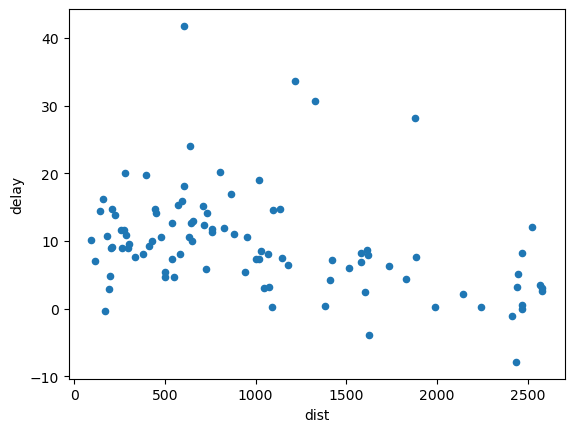

In [66]:
delays.plot(x="dist", y="delay", kind="scatter")

## Other summary statistics

Let's first remove cancelled flights:

In [67]:
not_cancelled = flights.dropna(subset = ['dep_delay', 'arr_delay'])
not_cancelled

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336765,2013,9,30,2240.0,2245,-5.0,2334.0,2351,-17.0,B6,1816,N354JB,JFK,SYR,41.0,209,22,45,2013-10-01 02:00:00+00:00
336766,2013,9,30,2240.0,2250,-10.0,2347.0,7,-20.0,B6,2002,N281JB,JFK,BUF,52.0,301,22,50,2013-10-01 02:00:00+00:00
336767,2013,9,30,2241.0,2246,-5.0,2345.0,1,-16.0,B6,486,N346JB,JFK,ROC,47.0,264,22,46,2013-10-01 02:00:00+00:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-10-01 02:00:00+00:00


For location: `mean()` or `median()`.


In [68]:
flights.groupby(['year', 'month', 'day']).agg(
  avg_delay1 = ('arr_delay', "mean"), 
  avg_delay2 = ('arr_delay', lambda x: np.mean(x[x > 0]))
)

avg_delay1  avg_delay2
year month day                        
2013 1     1     12.651023   32.481562
           2     12.692888   32.029907
           3      5.733333   27.660870
           4     -1.932819   28.309764
           5     -1.525802   22.558824
           6      4.236429   24.372703
           7     -4.947312   27.761317
           8     -3.227578   20.789091
           9     -0.264278   25.634146
           10    -5.898816   27.345455
           11    -4.762268   26.159836
           12   -13.016153   23.471698
           13    14.931846   52.548913
           14     3.640303   22.444444
           15     0.425653   19.710027
           16    34.247362   46.083458
           17     6.492896   25.602679
           18     1.841758   25.053824
           19    -8.526080   24.289062
           20     3.740077   29.029126
           21     6.315965   32.243590
           22    12.276836   33.883227
           23     6.917793   33.051813
           24    15.427313   42.088235
           25    27.098976   55.736944
           26     0.751118   29.058333
           27    -1.308933   36.024793
           28     9.319720   38.703608
           29    -6.555811   30.133333
           30    25.910804   57.428894
           31    32.602854   51.590444
     2     1      7.165198   30.290865
           2     -4.788774   26.194595
           3      0.025189   28.443299
           4      7.507625   33.155172
           5      6.766249   23.292735
           6     -1.282511   29.103203
           7      2.069189   26.704735
           8     24.228571   35.454810
           9      6.639175   37.007874
           10     6.659176   38.445455
           11    36.290094   62.482014
           12    -2.144796   26.017182
           13     0.026637   22.653740
           14     4.777311   26.404651
           15     0.769556   24.400524
           16     0.203804   29.846405
           17    -1.108434   35.627820
           18    -2.730074   31.022989
           19    12.819849   38.548807
           20     3.049303   33.492537
           21     7.915598   28.701493
           22    10.978655   32.619522
           23    14.711957   35.622871
           24     1.093211   30.911184
           25     1.371822   30.538682
           26     1.715719   29.851064
           27    31.252492   59.044828
           28    -9.168940   23.614173
     3     1     -0.690678   35.070796
           2     -3.257294   32.088462
           3     -6.398015   28.093385
           4     -2.333333   28.114286
           5     -3.888532   28.861345
           6      6.972187   46.834437
           7     16.230420   44.491342
           8     85.862155   97.485315
           9     -7.023936   34.135593
           10    -2.080931   35.546125
           11    -0.844969   27.080357
           12    22.556049   50.529297
           13    -3.333333   26.852201
           14     3.667347   33.248082
           15     0.590722   36.420245
           16    11.131406   30.976019
           17     6.551225   25.390909
           18    41.291892   64.746457
           19    26.489201   44.734921
           20     2.374086   28.238845
           21     3.508230   30.382653
           22     3.284979   33.024457
           23    13.767105   36.159036
           24    11.166479   39.157407
           25    10.370370   44.251208
           26    -7.690476   21.831169
           27    -6.323409   25.738318
           28    -6.454918   32.087156
           29    -9.594845   29.128834
           30   -13.737598   28.849057
           31    -0.762332   30.641577
     4     1     10.847758   35.018828
           2      4.581633   31.492308
           3      0.103239   21.008000
           4      5.278119   28.138085
           5      5.644535   28.078261
           6     -6.324641   27.707182
           7     -4.072767   23.301653
           8     -6.421053   24.801802
           9      0.383090   32.686957
           10    38.412311   94.130641
           11    20.499475   47.626168

Spread: `std`. Also, it's simple enough to define IQR or MAD. 

In [69]:
def IQR(x):
    Q3 = np.quantile(x, 0.75)
    Q1 = np.quantile(x, 0.25)
    return Q3 - Q1

In [70]:
def MAD(x):
    med = np.median(x)
    return np.mean(np.abs(x - med))

In [71]:
r = flights.groupby(['dest']).agg(
    distance_med = ('distance', 'median'),
    distance_std = ('distance', 'std'),
    distance_iqr = ('distance', IQR),
    distance_mad = ('distance', MAD)
).sort_values('distance_std', ascending = False)

It's simple enough to define IQR in Python.

In [72]:
r

,distance_med,distance_std,distance_iqr,distance_mad
dest,,,,
EGE,1726.0,10.549066,21.0,10.187793
SAN,2446.0,10.346588,21.0,8.700767
SFO,2586.0,10.216858,21.0,8.076438
HNL,4963.0,10.001783,20.0,9.674682
SEA,2422.0,9.979116,20.0,9.334693
LAS,2248.0,9.913856,21.0,7.038519
PDX,2454.0,9.880313,20.0,8.434269
PHX,2133.0,9.856062,20.0,8.303265
LAX,2475.0,9.657222,21.0,6.377643


- Rank: `min`, `max`, `median`, `quantile`

In [73]:
not_cancelled.groupby(['year', 'month', 'day']).agg(
  first = ('dep_time', "min"),
  last = ('dep_time', "max"),
  median = ('dep_time', "median"),
  q3 = ('dep_time', lambda x : np.quantile(x, 0.75))
)

first    last  median       q3
year month day                                
2013 1     1    517.0  2356.0  1431.0  1752.00
           2     42.0  2354.0  1407.5  1748.25
           3     32.0  2349.0  1423.0  1755.00
           4     25.0  2358.0  1412.0  1745.25
           5     14.0  2357.0  1347.0  1710.00
           6     16.0  2355.0  1451.0  1758.00
           7     49.0  2359.0  1379.0  1728.00
           8    454.0  2351.0  1401.0  1729.25
           9      2.0  2252.0  1355.0  1725.00
           10     3.0  2320.0  1354.0  1733.00
           11    11.0  2304.0  1352.0  1727.00
           12    30.0  2359.0  1324.0  1656.00
           13     1.0  2359.0  1449.0  1803.50
           14   453.0  2353.0  1354.0  1726.50
           15   453.0  2356.0  1402.0  1727.00
           16     2.0  2358.0  1359.0  1754.00
           17   453.0  2352.0  1357.0  1743.00
           18   455.0  2359.0  1401.5  1740.75
           19   456.0  2359.0  1324.0  1648.50
           20   525.0  2356.0  1446.0  1758.00
           21   455.0  2352.0  1410.5  1731.75
           22     5.0  2358.0  1400.0  1741.00
           23   158.0  2358.0  1402.5  1729.00
           24    37.0  2350.0  1421.0  1750.00
           25    15.0  2359.0  1354.0  1736.50
           26   107.0  2352.0  1341.0  1656.50
           27   523.0  2355.0  1454.0  1801.75
           28    10.0  2356.0  1352.0  1744.00
           29   448.0  2354.0  1354.0  1731.00
           30     3.0  2354.0  1344.0  1806.25
           31     1.0  2354.0  1421.0  1811.00
     2     1    456.0  2355.0  1410.0  1743.00
           2      3.0  2359.0  1329.0  1652.00
           3     31.0  2352.0  1456.5  1751.00
           4    453.0  2351.0  1358.0  1743.00
           5    450.0  2355.0  1354.0  1733.00
           6      6.0  2349.0  1352.0  1727.25
           7     27.0  2400.0  1353.0  1731.00
           8    458.0  1728.0   927.0  1227.00
           9    901.0  2358.0  1703.0  1856.00
           10   455.0  2359.0  1505.0  1811.00
           11     1.0  2400.0  1350.0  1817.00
           12    17.0  2358.0  1351.5  1721.00
           13     4.0  2353.0  1355.0  1730.00
           14     7.0  2358.0  1409.0  1741.50
           15     3.0  2358.0  1402.5  1741.75
           16     4.0  2357.0  1347.5  1709.25
           17    25.0  2356.0  1445.5  1756.00
           18     7.0  2347.0  1415.0  1743.00
           19     3.0  2355.0  1403.0  1749.00
           20    10.0  2353.0  1357.0  1731.00
           21    20.0  2356.0  1407.0  1741.00
           22     9.0  2359.0  1423.0  1748.00
           23    18.0  2355.0  1345.5  1715.25
           24     1.0  2353.0  1443.0  1755.00
           25    19.0  2357.0  1411.5  1740.25
           26     6.0  2356.0  1354.0  1731.00
           27    25.0  2348.0  1438.0  1821.50
           28   457.0  2359.0  1423.0  1737.00
     3     1      4.0  2357.0  1414.0  1755.25
           2     43.0  2356.0  1355.5  1710.75
           3    509.0  2353.0  1448.0  1807.00
           4     11.0  2353.0  1413.0  1732.00
           5    505.0  2351.0  1402.0  1731.00
           6      4.0  2356.0  1314.0  1736.00
           7      7.0  2351.0  1447.0  1808.00
           8      1.0  2359.0  1517.5  1912.25
           9     53.0  2345.0  1402.0  1716.75
           10     6.0  2354.0  1450.0  1810.75
           11    14.0  2355.0  1408.0  1742.50
           12     2.0  2359.0  1343.0  1819.00
           13   103.0  2355.0  1420.0  1739.50
           14     9.0  2355.0  1420.0  1800.00
           15    11.0  2400.0  1434.5  1757.00
           16    37.0  2356.0  1352.0  1721.00
           17    17.0  2321.0  1447.5  1802.75
           18     1.0  2357.0  1312.0  1721.00
           19     1.0  2357.0  1441.5  1807.75
           20    31.0  2358.0  1417.0  1753.00
           21     4.0  2352.0  1410.5  1755.25
           22    37.0  2400.0  1422.5  1804.00
           23    18.0  2349.0  1354.0  1722.50
           24     2.0  2357.0  1451.0  1813.00
           25    13.0

- Position: `.iloc`!

In [74]:
not_cancelled.groupby(['year', 'month', 'day']).agg(
  first_dep = ('dep_time', lambda x: x.iloc[0]),
  last_dep = ('dep_time', lambda x: x.iloc[-1]),
)

first_dep  last_dep
year month day                     
2013 1     1        517.0    2356.0
           2         42.0    2354.0
           3         32.0    2349.0
           4         25.0    2358.0
           5         14.0    2357.0
           6         16.0    2355.0
           7         49.0    2359.0
           8        454.0    2351.0
           9          2.0    2252.0
           10         3.0    2320.0
           11        11.0    2304.0
           12        30.0    2359.0
           13         1.0    2359.0
           14       453.0    2353.0
           15       453.0    2356.0
           16         2.0    2358.0
           17       453.0    2352.0
           18       455.0    2359.0
           19       456.0    2359.0
           20       525.0    2356.0
           21       455.0    2352.0
           22         5.0    2358.0
           23       158.0    2358.0
           24        37.0    2350.0
           25        15.0    2359.0
           26       107.0    2352.0
           27       523.0    2355.0
           28        10.0    2356.0
           29       448.0    2354.0
           30         3.0    2354.0
           31         1.0    2354.0
     2     1        456.0    2355.0
           2          3.0    2359.0
           3         31.0    2352.0
           4        453.0    2351.0
           5        450.0    2355.0
           6          6.0    2349.0
           7         27.0    2400.0
           8        458.0    1728.0
           9        901.0    2358.0
           10       455.0    2359.0
           11         1.0    2400.0
           12        17.0    2358.0
           13         4.0    2353.0
           14         7.0    2358.0
           15         3.0    2358.0
           16         4.0    2357.0
           17        25.0    2356.0
           18         7.0    2347.0
           19         3.0    2355.0
           20        10.0    2353.0
           21        20.0    2356.0
           22         9.0    2359.0
           23        18.0    2355.0
           24         1.0    2353.0
           25        19.0    2357.0
           26         6.0    2356.0
           27        25.0    2348.0
           28       457.0    2359.0
     3     1          4.0    2357.0
           2         43.0    2356.0
           3        509.0    2353.0
           4         11.0    2353.0
           5        505.0    2351.0
           6          4.0    2356.0
           7          7.0    2351.0
           8          1.0    2359.0
           9         53.0    2345.0
           10         6.0    2354.0
           11        14.0    2355.0
           12         2.0    2359.0
           13       103.0    2355.0
           14         9.0    2355.0
           15        11.0    2400.0
           16        37.0    2356.0
           17        17.0    2321.0
           18         1.0    2357.0
           19         1.0    2357.0
           20        31.0    2358.0
           21         4.0    2352.0
           22        37.0    2400.0
           23        18.0    2349.0
           24         2.0    2357.0
           25        13.0    2400.0
           26        18.0    2355.0
           27        10.0    2359.0
           28         4.0    2355.0
           29       453.0    2357.0
           30         6.0    2355.0
           31        51.0    2358.0
     4     1        454.0    2358.0
           2          9.0    2400.0
           3          2.0    2355.0
           4         14.0    2400.0
           5          1.0    2354.0
           6        453.0    2359.0
           7         30.0    2358.0
           8        454.0    2355.0
           9        449.0    2356.0
           10         1.0    2357.0
           11        25.0    2353.0
           12         2.0    2357.0
           13        59.0    2355.0
           14        16.0    2357.0
           15         2.0    2358.0
           16       454.0    2359.0
           17         8.0    2357.0
           18         2.0    2358.0
           19        11.0    2359.0
           20       

Count: `count` (removing missing values), `nunique`. You can use `len` of core Python to count entries without removing missing values. 

In [75]:
not_cancelled.groupby('dest').agg(
  carriers = ('carrier', lambda x: x.nunique(dropna = True))
).sort_values('carriers', ascending = False)

,carriers
dest,
ORD,7
CLT,7
ATL,7
BOS,7
TPA,7
DTW,6
PIT,6
STL,6
DCA,6


- Example: which aircraft flew most (in distance) in 2013?

In [76]:
not_cancelled.groupby('tailnum').agg(
  total_distance = ('distance', "sum")
).sort_values('total_distance', ascending = False)

,total_distance
tailnum,
N328AA,929090
N338AA,921172
N335AA,902271
N327AA,900482
N323AA,839468
...,...
N762SK,419
N824AS,296
N881AS,292


- Example: How many flights left before 5am? (these usually indicate delayed flights from the previous day)

In [77]:
not_cancelled.groupby(['year', 'month', 'day']).agg(
  n_early = ('dep_time', lambda x: np.sum(x < 500))
).sort_values('n_early', ascending = False)

n_early
year month day         
2013 6     28        32
     7     28        30
     4     10        30
     7     7         29
     3     18        29
     7     10        27
     6     27        25
           13        24
     7     22        22
     3     8         22
     8     8         22
     6     24        21
     9     12        21
     4     19        20
     5     23        15
     12    17        15
     5     8         14
     7     1         14
     2     11        14
     8     9         13
           1         13
     3     12        13
     7     8         12
     6     25        12
     4     22        12
     6     18        12
     7     23        11
     5     22        11
     6     2         10
     4     18        10
     7     19        10
     6     26        10
     7     12         9
     5     19         9
     6     30         9
     3     7          9
     7     2          9
     1     13         9
           31         9
     12    23         9
           5          9
     8     22         9
     9     2          9
     7     17         8
     4     17         8
     5     10         8
     4     23         8
     8     28         8
     5     11         8
     7     21         8
     10    7          7
     12    8          7
           14         7
     7     16         7
           18         7
     2     19         7
     4     12         7
     12    27         7
     6     10         7
           29         7
     3     17         6
     6     23         6
     5     20         6
     11    17         6
     3     24         6
     7     3          6
     4     24         6
     1     25         6
     12    16         6
     2     27         6
     7     11         6
     12    30         6
     2     15         6
     12    21         5
           12         5
     6     7          5
     8     11         5
     12    10         5
     6     17         5
     8     16         5
     5     2          5
     12    9          5
     7     13         5
           9          5
           6          5
     3     10         5
     2     23         5
     5     16         4
     12    22         4
     4     29         4
     8     5          4
     6     20         4
           21         4
           22         4
     11    21         4
     7     31         4
     9     20         4
           11         4
     8     26         4
           23         4
           21         4
     7     20         4
           25         4
     8     14         4
     7     27         4
     10    11         4
     12    31         4
     3     6          4
     1     3          4
     4     5          4
     3     19         4
           1          4
     2     26         4
           24         4
     3     26         4
     4     14         4
           11         4
     8     6          3
     12    13         3
     3     16         3
     1     11         3
     8     4          3
     3     21         3
           23         3
     6     14         3
     8     12         3
     3     25         3
           28         3
     8     3          3
     6     16         3
     8     10         3
     3     15         3
     7     15         3
     3     11         3
     7     26         3
     2     16         3
           17         3
           18         3
           20         3
     7     24         3
     2     22         3
     7     14         3
     12    7          3
           1          3
     1     16         3
     7     30         3
           4          3
     1     2          3
     8     17         3
     1     10         3
     2     14         3
     5     26         3
     1     4          3
     11    1          3
     4     3          3
     5     3          3
     12    26         3
           19         3
     1     24         3
     5     24         3
           25         3
     8     29         3
     1     5          3
     12    29         3
     4     25         3
     1  

Example: What proportion of flights are delayed by more than an hour?

In [78]:
(not_cancelled
 .groupby(['year', 'month', 'day'])
 .agg(
     hour_perc = ('arr_delay', lambda x: np.mean(x > 60))
 )
 .sort_values('hour_perc', ascending = False)
)

hour_perc
year month day           
2013 3     8     0.525063
     6     13    0.401816
     7     1     0.401368
           22    0.365967
     5     23    0.361111
     8     8     0.360603
     9     12    0.350327
     12    17    0.338922
     7     10    0.332151
     6     24    0.322618
     7     28    0.311916
           23    0.311384
     8     9     0.309345
     6     28    0.298611
           30    0.293833
           25    0.292632
     9     2     0.286564
     7     7     0.285877
     10    7     0.285868
     6     27    0.279910
     12    5     0.276885
     4     19    0.272936
     8     28    0.270033
     5     8     0.269877
     12    10    0.269283
     7     9     0.263158
     4     22    0.259338
     12    9     0.257778
           14    0.254902
     6     18    0.245614
     4     10    0.243902
     12    8     0.242236
     3     18    0.241081
     2     11    0.240566
     4     18    0.239451
           12    0.237418
     7     8     0.233753
     8     1     0.233083
     6     10    0.227176
     2     27    0.224806
     6     17    0.224156
           2     0.218027
           26    0.217622
     1     31    0.216409
     8     22    0.214588
     1     30    0.203518
     12    23    0.200000
     4     25    0.197917
     5     19    0.195556
     6     7     0.193370
     1     16    0.191090
     5     22    0.188804
     3     19    0.182505
     5     24    0.180085
     3     12    0.179800
     5     11    0.176387
     8     13    0.174893
     1     25    0.174061
     6     3     0.170502
     12    22    0.167043
     7     12    0.164802
     4     11    0.163694
           23    0.161430
     10    11    0.157219
     4     24    0.156652
     7     3     0.153450
     12    29    0.148618
     4     26    0.148262
     1     13    0.147460
     7     18    0.147271
     6     14    0.145530
     11    17    0.145161
     3     7     0.144154
     7     2     0.137297
           25    0.133673
           13    0.131646
     2     8     0.125275
     3     25    0.122334
     7     21    0.121816
     9     11    0.121577
     7     11    0.119099
     12    6     0.118363
     1     24    0.114537
     12    15    0.112745
     10    10    0.109744
     6     29    0.108723
     11    27    0.108495
     7     19    0.107472
     3     6     0.107459
     2     23    0.105978
           19    0.102481
     11    1     0.100427
     3     24    0.100112
     9     13    0.099794
     12    20    0.099792
     7     24    0.098577
     4     1     0.098019
     6     23    0.097588
     5     10    0.097107
     7     20    0.096939
     12    21    0.096130
     1     22    0.094915
     11    7     0.092324
     1     28    0.092182
     3     23    0.090789
     7     29    0.088957
     5     20    0.088174
           9     0.088083
     1     2     0.085129
     9     19    0.084974
     2     10    0.083645
           22    0.081110
     4     17    0.080169
     2     4     0.077342
     12    26    0.076344
     6     11    0.075884
     2     9     0.075601
     7     17    0.075051
     5     3     0.074766
     7     26    0.074187
     8     14    0.073887
     11    12    0.072690
     12    30    0.072403
     1     1     0.072202
     10    25    0.071138
     11    24    0.071106
     2     1     0.070485
     5     30    0.070480
     8     2     0.070480
     1     23    0.069820
     4     2     0.068367
     3     16    0.068331
     12    19    0.067288
     8     3     0.066835
     10    3     0.066667
     11    22    0.066599
     1     21    0.066519
     3     14    0.066327
     4     16    0.066089
           9     0.065762
     8     7     0.065392
     5     16    0.064286
     3     15    0.063918
     7     16    0.063136
     10    17    0.062690
     3     22    0.061728
     4     14    0.061538
     12    11    0.060445
     1     20    0.058899
     2     21    0.058761
     8     10    0.058531
     4     20    0.058355
     3     1

## Grouped assigns and filters
Recall the `flights_sml` dataframe created earlier:

In [79]:
flights_sml

,year,month,day,dep_delay,arr_delay,distance,air_time,gain,hours,gain_per_hour
0,2013,1,1,2.0,11.0,1400,227.0,9.0,3.783333,2.378855
1,2013,1,1,4.0,20.0,1416,227.0,16.0,3.783333,4.229075
2,2013,1,1,2.0,33.0,1089,160.0,31.0,2.666667,11.625000
3,2013,1,1,-1.0,-18.0,1576,183.0,-17.0,3.050000,-5.573770
4,2013,1,1,-6.0,-25.0,762,116.0,-19.0,1.933333,-9.827586
...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,NaN,213,NaN,NaN,NaN,NaN
336772,2013,9,30,NaN,NaN,198,NaN,NaN,NaN,NaN
336773,2013,9,30,NaN,NaN,764,NaN,NaN,NaN,NaN
336774,2013,9,30,NaN,NaN,419,NaN,NaN,NaN,NaN


Find the worst members of each group:

In [80]:
flights_sml.groupby(
  ['year', 'month', 'day']
  )['arr_delay'].nlargest(
    n = 10
)

year  month  day        
2013  1      1    151       851.0
                  834       456.0
                  649       338.0
                  673       263.0
                  801       250.0
                            ...  
      12     31   111017    155.0
                  110962    142.0
                  110653    140.0
                  111217    136.0
                  111144    122.0
Name: arr_delay, Length: 3650, dtype: float64

Find all groups bigger than a threshold:

In [81]:
popular_dests = flights.groupby('dest').filter(lambda x: len(x) > 365)
popular_dests

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 18:00:00+00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01 02:00:00+00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 16:00:00+00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 15:00:00+00:00


In [82]:
popular_dests.value_counts("dest")

dest
ORD    17283
ATL    17215
LAX    16174
BOS    15508
MCO    14082
CLT    14064
SFO    13331
FLL    12055
MIA    11728
DCA     9705
DTW     9384
DFW     8738
RDU     8163
TPA     7466
DEN     7266
IAH     7198
MSP     7185
PBI     6554
BNA     6333
LAS     5997
SJU     5819
IAD     5700
BUF     4681
PHX     4656
CLE     4573
STL     4339
MDW     4113
CVG     3941
SEA     3923
MSY     3799
RSW     3537
CMH     3524
CHS     2884
PIT     2875
MKE     2802
SAN     2737
JAX     2720
BTV     2589
SLC     2467
RIC     2454
AUS     2439
ROC     2416
PWM     2352
HOU     2115
IND     2077
MCI     2008
MEM     1789
BWI     1781
SYR     1761
PHL     1632
GSO     1606
ORF     1536
DAY     1525
PDX     1354
SRQ     1211
SDF     1157
XNA     1036
MHT     1009
BQN      896
CAK      864
GSP      849
OMA      849
SNA      825
SAV      804
GRR      765
HNL      707
SAT      686
LGB      668
TYS      631
MSN      572
DSM      569
STT      522
BDL      443
ALB      439
PVD      376
BGR      375
BUR    

Standardise to compute per group metrics:

In [83]:
popular_dests[popular_dests['arr_delay'] > 0].groupby(
  'dest'
  ).apply(
  lambda x: x['arr_delay'] / x['arr_delay'].sum()
)

dest        
ALB   569       0.004175
      784       0.004593
      1536      0.007411
      1757      0.008559
      2425      0.004175
                  ...   
XNA   325031    0.006818
      326901    0.001737
      330832    0.000386
      332101    0.007204
      335551    0.000257
Name: arr_delay, Length: 131106, dtype: float64

`apply()` applies the function group-wise and combine the results together.

Compute mean gain of delayed flights by airport?

In [86]:
(popular_dests[popular_dests['arr_delay'] > 0]
 .groupby('dest')
 .apply(
     lambda x : (x['arr_delay'] - x['dep_delay']).mean()
 )
)

dest
ALB    -4.929348
ATL     8.451800
AUS     7.570702
BDL    -7.347222
BGR    -5.291971
BNA     5.745249
BOS     4.122496
BQN     2.896386
BTV     1.105108
BUF     3.010656
BUR    11.289157
BWI     4.513514
CAK     4.263274
CHS     5.639564
CLE     5.149944
CLT     8.747688
CMH     6.988120
CVG     4.502976
DAY     3.056962
DCA     8.235324
DEN     6.256052
DFW     7.279903
DSM     0.526923
DTW     3.680381
FLL     7.073292
GRR     5.380952
GSO     2.086826
GSP     3.818898
HNL     5.962343
HOU     5.339623
IAD     4.485474
IAH     6.664932
IND     5.049220
JAX     3.982968
LAS     6.794118
LAX     7.955757
LGB     6.640167
MCI     4.214442
MCO     5.477908
MDW     1.645144
MEM     6.255659
MHT    -2.731235
MIA     5.556939
MKE     4.262320
MSN     3.978947
MSP     5.638267
MSY     4.287909
OMA     2.813953
ORD     5.102614
ORF     2.305057
PBI     6.413937
PDX     3.971171
PHL    10.582712
PHX     6.718033
PIT     2.358333
PVD    -2.309392
PWM     0.876393
RDU     6.177372
RIC     2

In [126]:
from sklearn.linear_model import LinearRegression

def coef(data_group):
    x = data_group[["distance"]] # 2 brackets because X should be a df
    y = data_group["arr_delay"]   # 1 bracket because y should be a series
    LR = LinearRegression()
    LR.fit(x, y)
    return LR.coef_[0]

In [127]:
(popular_dests[popular_dests['arr_delay'] > 0]
 .groupby('dest')
 .apply(coef)
)

dest
ALB    0.000000
ATL   -0.331232
AUS    0.457922
BDL    0.000000
BGR    0.000000
BNA   -0.189374
BOS    0.742303
BQN    1.131475
BTV   -1.365506
BUF    0.276488
BUR    0.000000
BWI    0.437257
CAK    0.000000
CHS   -0.078322
CLE    0.452312
CLT    0.006767
CMH    0.130014
CVG    0.331287
DAY   -0.239832
DCA   -0.708036
DEN    0.318551
DFW   -0.525782
DSM   -1.797738
DTW   -0.204620
FLL    0.573716
GRR   -2.063276
GSO    0.408788
GSP   -0.943167
HNL    0.041687
HOU   -0.323447
IAD    0.268947
IAH    0.149168
IND    0.118934
JAX   -0.042269
LAS   -0.173797
LAX    0.047859
LGB    0.000000
MCI    0.313976
MCO    0.527362
MDW    0.025265
MEM   -0.144596
MHT   -0.272644
MIA   -0.305232
MKE   -0.758499
MSN    0.821779
MSP   -0.207137
MSY   -0.367134
OMA    1.203376
ORD    0.324373
ORF    1.133058
PBI    0.072614
PDX    0.452853
PHL   -1.969808
PHX    0.078739
PIT   -0.183256
PVD    0.000000
PWM    0.724685
RDU   -0.519437
RIC   -0.155878
ROC   -0.665913
RSW    0.376434
SAN    0.058337
SAT

## Combine DataFrames

`nycflights13` package has >1 tables.

We already know a lot about `flights`:

In [87]:
flights

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 10:00:00+00:00
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 10:00:00+00:00
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 10:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,NaN,1455,NaN,NaN,1634,NaN,9E,3393,NaN,JFK,DCA,NaN,213,14,55,2013-09-30 18:00:00+00:00
336772,2013,9,30,NaN,2200,NaN,NaN,2312,NaN,9E,3525,NaN,LGA,SYR,NaN,198,22,0,2013-10-01 02:00:00+00:00
336773,2013,9,30,NaN,1210,NaN,NaN,1330,NaN,MQ,3461,N535MQ,LGA,BNA,NaN,764,12,10,2013-09-30 16:00:00+00:00
336774,2013,9,30,NaN,1159,NaN,NaN,1344,NaN,MQ,3572,N511MQ,LGA,CLE,NaN,419,11,59,2013-09-30 15:00:00+00:00


Actually, `airlines` is not new to you, either:

In [88]:
from nycflights13 import airlines

airlines

,carrier,name
0,9E,Endeavor Air Inc.
1,AA,American Airlines Inc.
2,AS,Alaska Airlines Inc.
3,B6,JetBlue Airways
4,DL,Delta Air Lines Inc.
5,EV,ExpressJet Airlines Inc.
6,F9,Frontier Airlines Inc.
7,FL,AirTran Airways Corporation
8,HA,Hawaiian Airlines Inc.
9,MQ,Envoy Air


We also had `airports`!

In [89]:
from nycflights13 import airports

airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


`planes`, 

In [90]:
from nycflights13 import planes

planes

,tailnum,year,type,manufacturer,model,engines,seats,speed,engine
0,N10156,2004.0,Fixed wing multi engine,EMBRAER,EMB-145XR,2,55,NaN,Turbo-fan
1,N102UW,1998.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
2,N103US,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
3,N104UW,1999.0,Fixed wing multi engine,AIRBUS INDUSTRIE,A320-214,2,182,NaN,Turbo-fan
4,N10575,2002.0,Fixed wing multi engine,EMBRAER,EMB-145LR,2,55,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...
3317,N997AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3318,N997DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS AIRCRAFT CO,MD-88,2,142,NaN,Turbo-fan
3319,N998AT,2002.0,Fixed wing multi engine,BOEING,717-200,2,100,NaN,Turbo-fan
3320,N998DL,1992.0,Fixed wing multi engine,MCDONNELL DOUGLAS CORPORATION,MD-88,2,142,NaN,Turbo-jet


and `weather`.

In [91]:
from nycflights13 import weather

weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26110,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,2013-12-30T19:00:00Z
26111,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,2013-12-30T20:00:00Z
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,2013-12-30T21:00:00Z
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,2013-12-30T22:00:00Z


We know we have relations between the columns of each dataframe: 

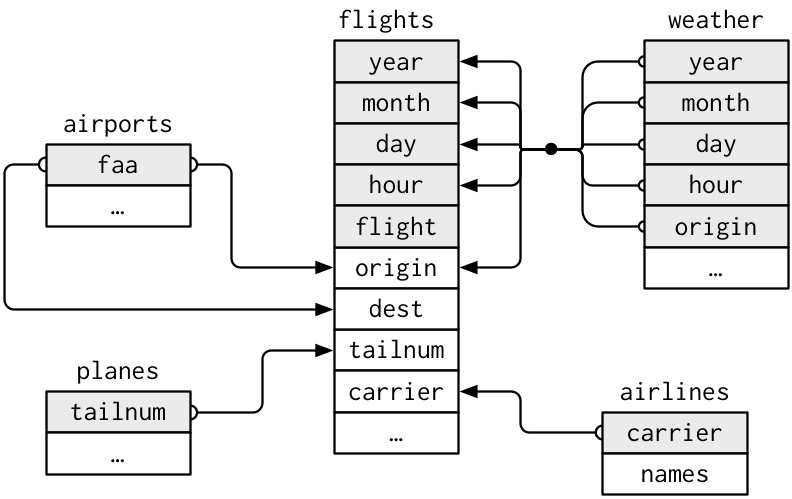

### Keys.

A __primary key__ uniquely identifies an observation in its own table.

A __foreign key__ uniquely identifies an observation in another table.

Then, how do we combine tables based on these relationships?

Let's use small example dataframes:

In [92]:
x = pd.DataFrame({
  'key': [1, 2, 4],
  'val_x': ['x1', 'x2', 'x3']
})
x

,key,val_x
0,1,x1
1,2,x2
2,4,x3


In [93]:
y = pd.DataFrame({
  'key': [1, 2, 3],
  'val_y': ['y1', 'y2', 'y3']
})
y

,key,val_y
0,1,y1
1,2,y2
2,3,y3


### The `merge` method

`pandas` dataframes have `merge` method for joining data frames.  (there also is a `join` method with a subtle difference. [See this link](https://www.geeksforgeeks.org/what-is-the-difference-between-join-and-merge-in-pandas/) for the details. 

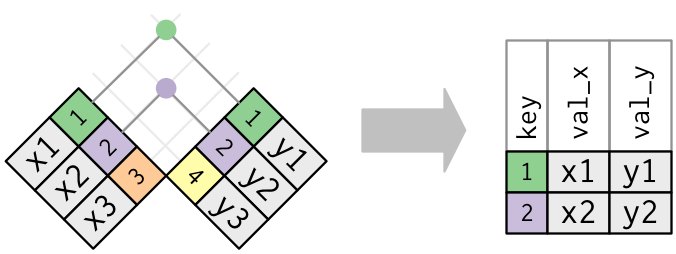

In [94]:
x.merge(y, on = 'key', how = 'inner')

,key,val_x,val_y
0,1,x1,y1
1,2,x2,y2


In [95]:
x.merge(y, on = 'key', how = 'left')

,key,val_x,val_y
0,1,x1,y1
1,2,x2,y2
2,4,x3,NaN


In [96]:
x.merge(y, on = 'key', how = 'right')

,key,val_x,val_y
0,1,x1,y1
1,2,x2,y2
2,3,NaN,y3


In [97]:
x.merge(y, on = 'key', how = 'outer')

,key,val_x,val_y
0,1,x1,y1
1,2,x2,y2
2,4,x3,NaN
3,3,NaN,y3


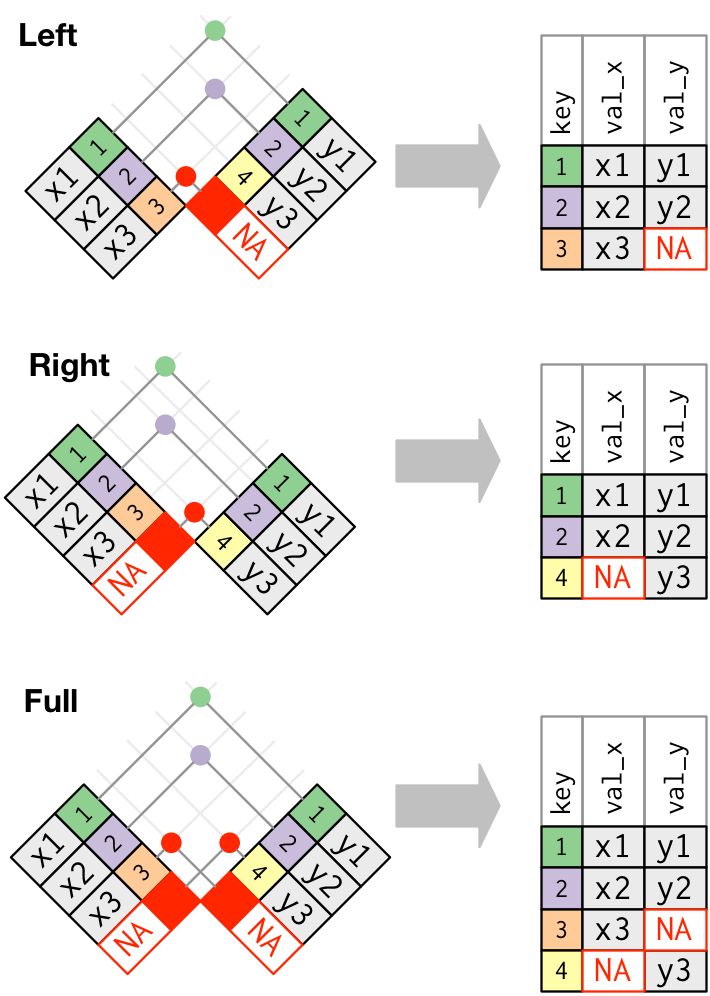

### Duplicate Keys

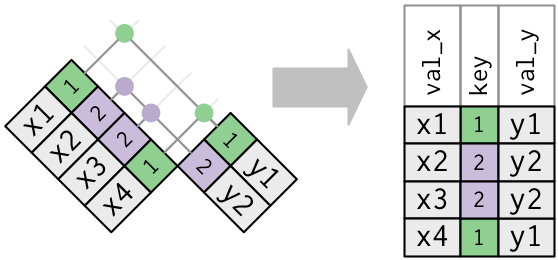

Let's consider the case with one table having duplicate keys.

In [101]:
x = pd.DataFrame({
  'key': [1, 2, 2, 1],
  'val_x': ["x1", "x2", "x3", "x4"]
})
x

,key,val_x
0,1,x1
1,2,x2
2,2,x3
3,1,x4


In [102]:
y = pd.DataFrame({
  'key': [1, 2],
  'val_y': ["y1", "y2"]
})
y

,key,val_y
0,1,y1
1,2,y2


In [104]:
x.merge(y, on = 'key', how = 'inner')

,key,val_x,val_y
0,1,x1,y1
1,1,x4,y1
2,2,x2,y2
3,2,x3,y2


Both tables have duplicate keys. You get all possible combinations, the Cartesian product:

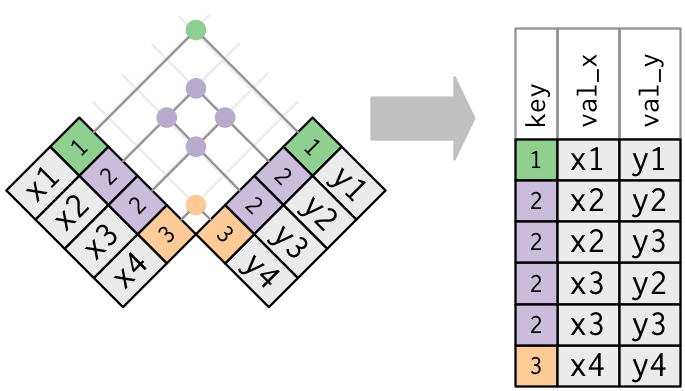

In [105]:
x = pd.DataFrame({
  'key': [1, 2, 2, 3],
  'val_x': ["x1", "x2", "x3", "x4"]
})
x

,key,val_x
0,1,x1
1,2,x2
2,2,x3
3,3,x4


In [106]:
y = pd.DataFrame({
  'key': [1, 2, 2, 3],
  'val_y': ["y1", "y2", "y3", "y4"]
})
y

,key,val_y
0,1,y1
1,2,y2
2,2,y3
3,3,y4


In [108]:
x.merge(y, on = 'key', how = 'inner')


,key,val_x,val_y
0,1,x1,y1
1,2,x2,y2
2,2,x2,y3
3,2,x3,y2
4,2,x3,y3
5,3,x4,y4


### Back to the airline data. 

In [109]:
flights2 = flights[['year', 'month', 'day', 'hour', 'origin', 'dest', 'tailnum', 'carrier']]
flights2

,year,month,day,hour,origin,dest,tailnum,carrier
0,2013,1,1,5,EWR,IAH,N14228,UA
1,2013,1,1,5,LGA,IAH,N24211,UA
2,2013,1,1,5,JFK,MIA,N619AA,AA
3,2013,1,1,5,JFK,BQN,N804JB,B6
4,2013,1,1,6,LGA,ATL,N668DN,DL
...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E
336772,2013,9,30,22,LGA,SYR,NaN,9E
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ


We want to merge with the `weather` table:

In [110]:
weather

,origin,year,month,day,hour,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,EWR,2013,1,1,1,39.02,26.06,59.37,270.0,10.35702,NaN,0.0,1012.0,10.0,2013-01-01T06:00:00Z
1,EWR,2013,1,1,2,39.02,26.96,61.63,250.0,8.05546,NaN,0.0,1012.3,10.0,2013-01-01T07:00:00Z
2,EWR,2013,1,1,3,39.02,28.04,64.43,240.0,11.50780,NaN,0.0,1012.5,10.0,2013-01-01T08:00:00Z
3,EWR,2013,1,1,4,39.92,28.04,62.21,250.0,12.65858,NaN,0.0,1012.2,10.0,2013-01-01T09:00:00Z
4,EWR,2013,1,1,5,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26110,LGA,2013,12,30,14,35.96,19.94,51.78,340.0,13.80936,21.86482,0.0,1017.1,10.0,2013-12-30T19:00:00Z
26111,LGA,2013,12,30,15,33.98,17.06,49.51,330.0,17.26170,21.86482,0.0,1018.8,10.0,2013-12-30T20:00:00Z
26112,LGA,2013,12,30,16,32.00,15.08,49.19,340.0,14.96014,23.01560,0.0,1019.5,10.0,2013-12-30T21:00:00Z
26113,LGA,2013,12,30,17,30.92,12.92,46.74,320.0,17.26170,NaN,0.0,1019.9,10.0,2013-12-30T22:00:00Z


In [111]:
keys = ['origin', 'year', 'month', 'day', 'hour']
flights2.merge(weather,
  on = keys,
  how = 'left')

,year,month,day,hour,origin,dest,tailnum,carrier,temp,dewp,humid,wind_dir,wind_speed,wind_gust,precip,pressure,visib,time_hour
0,2013,1,1,5,EWR,IAH,N14228,UA,39.02,28.04,64.43,260.0,12.65858,NaN,0.0,1011.9,10.0,2013-01-01T10:00:00Z
1,2013,1,1,5,LGA,IAH,N24211,UA,39.92,24.98,54.81,250.0,14.96014,21.86482,0.0,1011.4,10.0,2013-01-01T10:00:00Z
2,2013,1,1,5,JFK,MIA,N619AA,AA,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01T10:00:00Z
3,2013,1,1,5,JFK,BQN,N804JB,B6,39.02,26.96,61.63,260.0,14.96014,NaN,0.0,1012.1,10.0,2013-01-01T10:00:00Z
4,2013,1,1,6,LGA,ATL,N668DN,DL,39.92,24.98,54.81,260.0,16.11092,23.01560,0.0,1011.7,10.0,2013-01-01T11:00:00Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E,68.00,55.04,63.21,190.0,11.50780,NaN,0.0,1016.6,10.0,2013-09-30T18:00:00Z
336772,2013,9,30,22,LGA,SYR,NaN,9E,64.94,53.06,65.37,200.0,6.90468,NaN,0.0,1015.8,10.0,2013-10-01T02:00:00Z
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,69.08,48.02,46.99,70.0,5.75390,NaN,0.0,1016.7,10.0,2013-09-30T16:00:00Z
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,66.92,48.92,52.35,70.0,8.05546,NaN,0.0,1017.5,10.0,2013-09-30T15:00:00Z


Match the common variable `tailnum`:

In [112]:
flights2.merge(
  planes, 
  on = 'tailnum', 
  how = 'left',
  suffixes = ('_x', '_y')
)

,year_x,month,day,hour,origin,dest,tailnum,carrier,year_y,type,manufacturer,model,engines,seats,speed,engine
0,2013,1,1,5,EWR,IAH,N14228,UA,1999.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
1,2013,1,1,5,LGA,IAH,N24211,UA,1998.0,Fixed wing multi engine,BOEING,737-824,2.0,149.0,NaN,Turbo-fan
2,2013,1,1,5,JFK,MIA,N619AA,AA,1990.0,Fixed wing multi engine,BOEING,757-223,2.0,178.0,NaN,Turbo-fan
3,2013,1,1,5,JFK,BQN,N804JB,B6,2012.0,Fixed wing multi engine,AIRBUS,A320-232,2.0,200.0,NaN,Turbo-fan
4,2013,1,1,6,LGA,ATL,N668DN,DL,1991.0,Fixed wing multi engine,BOEING,757-232,2.0,178.0,NaN,Turbo-fan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336772,2013,9,30,22,LGA,SYR,NaN,9E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Match variable `a` in table `x` to the variable `b` in table `y`.

In [113]:
airports

,faa,name,lat,lon,alt,tz,dst,tzone
0,04G,Lansdowne Airport,41.130472,-80.619583,1044,-5,A,America/New_York
1,06A,Moton Field Municipal Airport,32.460572,-85.680028,264,-6,A,America/Chicago
2,06C,Schaumburg Regional,41.989341,-88.101243,801,-6,A,America/Chicago
3,06N,Randall Airport,41.431912,-74.391561,523,-5,A,America/New_York
4,09J,Jekyll Island Airport,31.074472,-81.427778,11,-5,A,America/New_York
...,...,...,...,...,...,...,...,...
1453,ZUN,Black Rock,35.083228,-108.791778,6454,-7,A,America/Denver
1454,ZVE,New Haven Rail Station,41.298669,-72.925992,7,-5,A,America/New_York
1455,ZWI,Wilmington Amtrak Station,39.736667,-75.551667,0,-5,A,America/New_York
1456,ZWU,Washington Union Station,38.897460,-77.006430,76,-5,A,America/New_York


In [114]:
flights2

,year,month,day,hour,origin,dest,tailnum,carrier
0,2013,1,1,5,EWR,IAH,N14228,UA
1,2013,1,1,5,LGA,IAH,N24211,UA
2,2013,1,1,5,JFK,MIA,N619AA,AA
3,2013,1,1,5,JFK,BQN,N804JB,B6
4,2013,1,1,6,LGA,ATL,N668DN,DL
...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E
336772,2013,9,30,22,LGA,SYR,NaN,9E
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ


In [115]:
flights2.merge(airports, left_on="dest", right_on="faa", how="left")

,year,month,day,hour,origin,dest,tailnum,carrier,faa,name,lat,lon,alt,tz,dst,tzone
0,2013,1,1,5,EWR,IAH,N14228,UA,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
1,2013,1,1,5,LGA,IAH,N24211,UA,IAH,George Bush Intercontinental,29.984433,-95.341442,97.0,-6.0,A,America/Chicago
2,2013,1,1,5,JFK,MIA,N619AA,AA,MIA,Miami Intl,25.793250,-80.290556,8.0,-5.0,A,America/New_York
3,2013,1,1,5,JFK,BQN,N804JB,B6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2013,1,1,6,LGA,ATL,N668DN,DL,ATL,Hartsfield Jackson Atlanta Intl,33.636719,-84.428067,1026.0,-5.0,A,America/New_York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336771,2013,9,30,14,JFK,DCA,NaN,9E,DCA,Ronald Reagan Washington Natl,38.852083,-77.037722,15.0,-5.0,A,America/New_York
336772,2013,9,30,22,LGA,SYR,NaN,9E,SYR,Syracuse Hancock Intl,43.111187,-76.106311,421.0,-5.0,A,America/New_York
336773,2013,9,30,12,LGA,BNA,N535MQ,MQ,BNA,Nashville Intl,36.124472,-86.678194,599.0,-6.0,A,America/Chicago
336774,2013,9,30,11,LGA,CLE,N511MQ,MQ,CLE,Cleveland Hopkins Intl,41.411689,-81.849794,791.0,-5.0,A,America/New_York


## Combine rows

Top 10 most popular destinations:

In [116]:
top_dest = (flights.groupby('dest')['dest']
            .count()
            .to_frame(name = 'n')
            .reset_index()
            .sort_values('n', ascending = False)
            .head(10)
           )
top_dest 

,dest,n
69,ORD,17283
4,ATL,17215
49,LAX,16174
11,BOS,15508
54,MCO,14082
23,CLT,14064
90,SFO,13331
35,FLL,12055
58,MIA,11728
28,DCA,9705


How to filter the cases that fly to these destinations?

In 203B, we discussed semi-join:

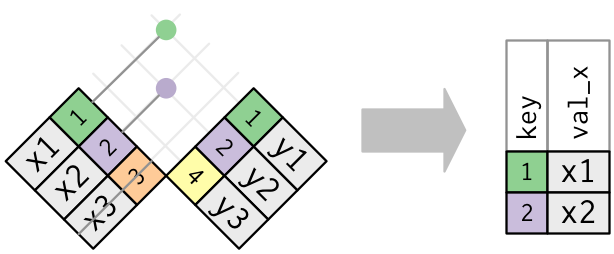

and anti-join:
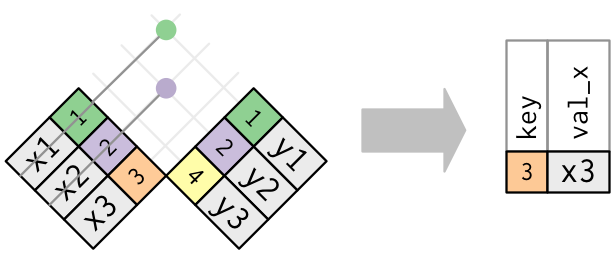

In Python, a simple way to do these would be through indexing via `.isin()` method.  

Semi-join, only choosing rows with matching values in another dataframe's column:

In [117]:
flights.loc[flights['dest'].isin(top_dest['dest'])]

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 10:00:00+00:00
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 11:00:00+00:00
5,2013,1,1,554.0,558,-4.0,740.0,728,12.0,UA,1696,N39463,EWR,ORD,150.0,719,5,58,2013-01-01 10:00:00+00:00
6,2013,1,1,555.0,600,-5.0,913.0,854,19.0,B6,507,N516JB,EWR,FLL,158.0,1065,6,0,2013-01-01 11:00:00+00:00
8,2013,1,1,557.0,600,-3.0,838.0,846,-8.0,B6,79,N593JB,JFK,MCO,140.0,944,6,0,2013-01-01 11:00:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336755,2013,9,30,2149.0,2156,-7.0,2245.0,2308,-23.0,UA,523,N813UA,EWR,BOS,37.0,200,21,56,2013-10-01 01:00:00+00:00
336762,2013,9,30,2233.0,2113,80.0,112.0,30,42.0,UA,471,N578UA,EWR,SFO,318.0,2565,21,13,2013-10-01 01:00:00+00:00
336763,2013,9,30,2235.0,2001,154.0,59.0,2249,130.0,B6,1083,N804JB,JFK,MCO,123.0,944,20,1,2013-10-01 00:00:00+00:00
336768,2013,9,30,2307.0,2255,12.0,2359.0,2358,1.0,B6,718,N565JB,JFK,BOS,33.0,187,22,55,2013-10-01 02:00:00+00:00


Anti-join, removing rows with matching values in another dataframe's column:

In [118]:
(flights.loc[~flights['tailnum'].isin(planes['tailnum'])]
 .groupby('tailnum')['tailnum']
 .count()
 .sort_values(ascending = False)
)

tailnum
N725MQ    575
N722MQ    513
N723MQ    507
N713MQ    483
N735MQ    396
         ... 
N7ASAA      1
N3LFAA      1
N7ALAA      1
N7AEAA      1
N5ERAA      1
Name: tailnum, Length: 721, dtype: int64

## Concatenation of dataframes


In [119]:
df1 = pd.DataFrame({
  'x': [1, 2],
  'y': [1, 1]
})
df1

,x,y
0,1,1
1,2,1


In [120]:
df2 = pd.DataFrame({
  'x': [1, 1],
  'y': [1, 2]
})
df2

,x,y
0,1,1
1,1,2


In [121]:
df3 = pd.DataFrame({
  'z': [5, 6],
  'w': [7, 8]
})
df3

,z,w
0,5,7
1,6,8


In [122]:
pd.concat([df1, df2], axis = 0)

,x,y
0,1,1
1,2,1
0,1,1
1,1,2


In [123]:
pd.concat([df1, df3], axis = 1)

,x,y,z,w
0,1,1,5,7
1,2,1,6,8
